In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Indian_IPO_Market_Data.csv")
df.shape

(319, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


In [4]:
df["Listing_Gains_Percent"].describe()

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64

In [5]:
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000
max,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,270.400000


In [6]:
df["Listing_Gains_Profit"] = np.where(df["Listing_Gains_Percent"] > 0, 1, 0)

In [7]:
df["Listing_Gains_Profit"].describe()

count    319.000000
mean       0.545455
std        0.498712
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Listing_Gains_Profit, dtype: float64

In [8]:
df = df.drop(['Date ', 'IPOName', 'Listing_Gains_Percent'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Issue_Size            319 non-null    float64
 1   Subscription_QIB      319 non-null    float64
 2   Subscription_HNI      319 non-null    float64
 3   Subscription_RII      319 non-null    float64
 4   Subscription_Total    319 non-null    float64
 5   Issue_Price           319 non-null    int64  
 6   Listing_Gains_Profit  319 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 17.6 KB


In [9]:
df['Listing_Gains_Profit'].value_counts()

1    174
0    145
Name: Listing_Gains_Profit, dtype: int64

In [10]:
df['Listing_Gains_Profit'].value_counts(normalize=True)

1    0.545455
0    0.454545
Name: Listing_Gains_Profit, dtype: float64

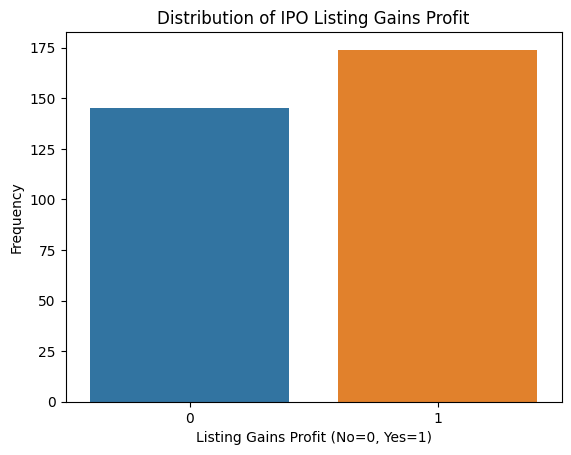

In [11]:
# visualizing the target variable
sns.countplot(x='Listing_Gains_Profit', data=df)
plt.title('Distribution of IPO Listing Gains Profit')
plt.xlabel('Listing Gains Profit (No=0, Yes=1)')
plt.ylabel('Frequency')
plt.show()

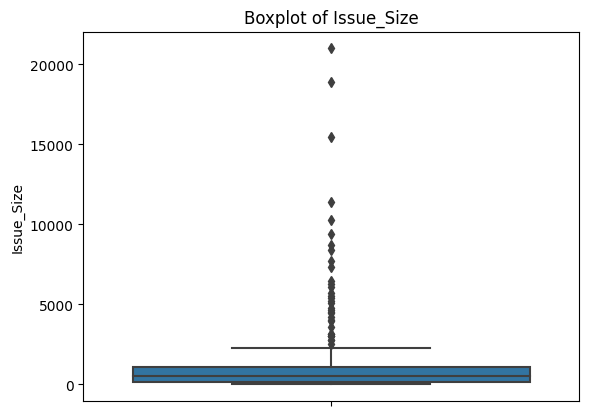

In [12]:
sns.boxplot(data=df, y='Issue_Size')
plt.title('Boxplot of Issue_Size')
plt.show()

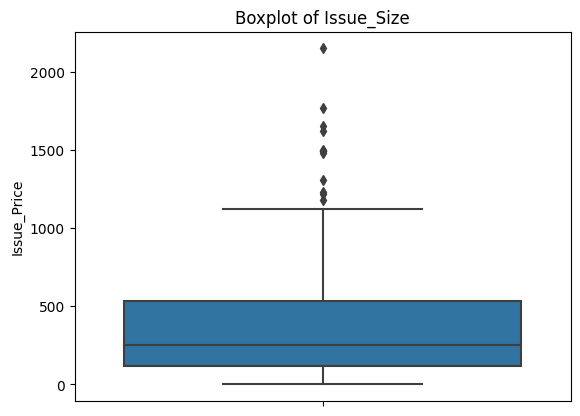

In [13]:
sns.boxplot(data=df, y='Issue_Price')
plt.title('Boxplot of Issue_Size')
plt.show()

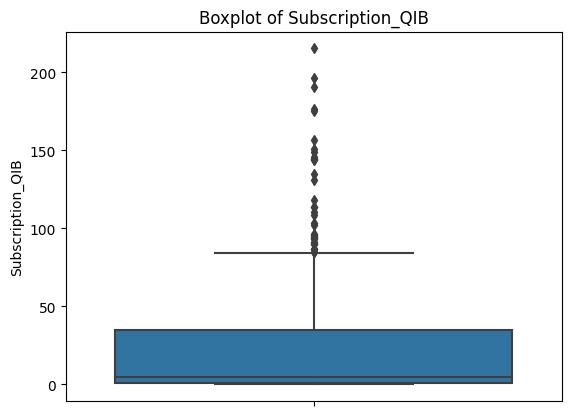

In [14]:
sns.boxplot(data=df, y='Subscription_QIB')
plt.title('Boxplot of Subscription_QIB')
plt.show()

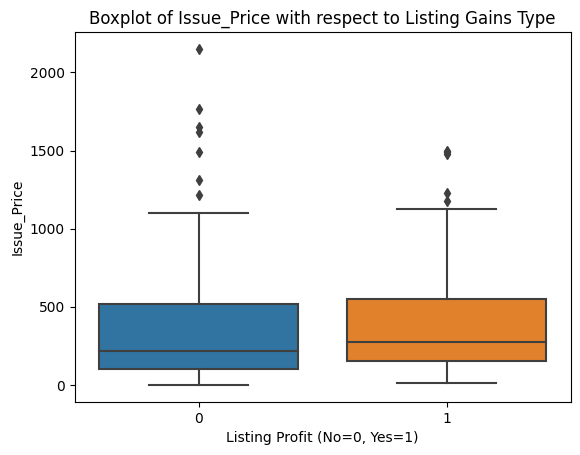

In [15]:
sns.boxplot(data=df, x='Listing_Gains_Profit', y='Issue_Price')
plt.title('Boxplot of Issue_Price with respect to Listing Gains Type')
plt.xlabel('Listing Profit (No=0, Yes=1)')
plt.show()

In [16]:
df.skew()

Issue_Size              4.853402
Subscription_QIB        2.143705
Subscription_HNI        3.078445
Subscription_RII        3.708274
Subscription_Total      2.911907
Issue_Price             1.696881
Listing_Gains_Profit   -0.183438
dtype: float64

In [17]:
q1 = df['Issue_Size'].quantile(q=0.25)
q3 = df['Issue_Size'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print(iqr)
print(lower)
print(upper)
df['Issue_Size'] = df['Issue_Size'].clip(lower, upper)
df['Issue_Size'].describe()

930.995
-1227.4875000000002
2496.4925000000003


count     319.000000
mean      763.561238
std       769.689122
min         0.000000
25%       169.005000
50%       496.250000
75%      1100.000000
max      2496.492500
Name: Issue_Size, dtype: float64

In [18]:
q1 = df['Subscription_QIB'].quantile(q=0.25)
q3 = df['Subscription_QIB'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print(iqr)
print(lower)
print(upper)
df['Subscription_QIB'] = df['Subscription_QIB'].clip(lower, upper)
df['Subscription_QIB'].describe()

33.48500000000001
-49.07750000000001
84.86250000000001


count    319.000000
mean      21.521183
std       29.104549
min        0.000000
25%        1.150000
50%        4.940000
75%       34.635000
max       84.862500
Name: Subscription_QIB, dtype: float64

In [19]:
q1 = df['Subscription_HNI'].quantile(q=0.25)
q3 = df['Subscription_HNI'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print(iqr)
print(lower)
print(upper)
df['Subscription_HNI'] = df['Subscription_HNI'].clip(lower, upper)
df['Subscription_HNI'].describe()

60.839999999999996
-90.005
153.355


count    319.000000
mean      40.356426
std       57.427921
min        0.000000
25%        1.255000
50%        5.070000
75%       62.095000
max      153.355000
Name: Subscription_HNI, dtype: float64

In [20]:
q1 = df['Subscription_RII'].quantile(q=0.25)
q3 = df['Subscription_RII'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print(iqr)
print(lower)
print(upper)
df['Subscription_RII'] = df['Subscription_RII'].clip(lower, upper)
df['Subscription_RII'].describe()

7.33
-9.72
19.6


count    319.000000
mean       6.060940
std        6.176882
min        0.000000
25%        1.275000
50%        3.420000
75%        8.605000
max       19.600000
Name: Subscription_RII, dtype: float64

In [21]:
q1 = df['Subscription_Total'].quantile(q=0.25)
q3 = df['Subscription_Total'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print(iqr)
print(lower)
print(upper)
df['Subscription_Total'] = df['Subscription_Total'].clip(lower, upper)
df['Subscription_Total'].describe()

31.749999999999996
-45.97999999999999
81.01999999999998


count    319.000000
mean      20.456646
std       27.217740
min        0.000000
25%        1.645000
50%        4.930000
75%       33.395000
max       81.020000
Name: Subscription_Total, dtype: float64

In [22]:
dependent = ["Listing_Gains_Profit"]
independent = ["Issue_Size", "Issue_Price", "Subscription_QIB", "Subscription_HNI", "Subscription_RII", "Subscription_Total"]
df[independent] = df[independent]/df[independent].max()
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.305854,0.253601,0.263157,0.309232,0.252489,0.174478,0.545455
std,0.308308,0.342961,0.374477,0.315147,0.335939,0.164604,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067697,0.013551,0.008184,0.065051,0.020304,0.055349,0.000000
50%,0.198779,0.058212,0.033061,0.174490,0.060849,0.116279,1.000000
75%,0.440618,0.408131,0.404910,0.439031,0.412182,0.249302,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
X = df[independent].values
y = df[dependent].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=364)
print(X_train.shape); print(X_test.shape)

(223, 6)
(96, 6)


In [24]:
tf.random.set_seed(364)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation= 'relu'))
model.add(tf.keras.layers.Dense(8, activation= 'relu'))
model.add(tf.keras.layers.Dense(4, activation= 'relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))    

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
7/7 [==============================] - 1s 1ms/step - loss: 0.6958 - accuracy: 0.4619
Epoch 2/250
7/7 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5426
Epoch 3/250
7/7 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5516
Epoch 4/250
7/7 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.5605
Epoch 5/250
7/7 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.5605
Epoch 6/250
7/7 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.5605
Epoch 7/250
7/7 [==============================] - 0s 1ms/step - loss: 0.6535 - accuracy: 0.5605
Epoch 8/250
7/7 [==============================] - 0s 1ms/step - loss: 0.6465 - accuracy: 0.5605
Epoch 9/250
7/7 [==============================] - 0s 1ms/step - loss: 0.6415 - accuracy: 0.5605
Epoch 10/250
7/7 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.5605
Epoch 11/250
7/7 [===========

In [28]:
model.evaluate(X_train, y_train)

7/7 [==============================] - 0s 1ms/step - loss: 0.4538 - accuracy: 0.7758


[0.4537603259086609, 0.7757847309112549]

In [31]:
model.evaluate(X_train, y_train)

7/7 [==============================] - 0s 914us/step - loss: 0.4538 - accuracy: 0.7758


[0.4537603259086609, 0.7757847309112549]

In [32]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.7530 - accuracy: 0.6667


[0.7529543042182922, 0.6666666865348816]